<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/Logistic_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [95]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [52]:
df = pd.read_csv('/content/tumor.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


# Creating a classifier

## Getting X & Y


In [81]:
#TODO 
# have to randomize the data first
# After that have to divide in X and Y 

## Target Values 
X = df.drop(columns=['Class'])
X = np.array(X)
print(X.shape)

## Label Values
Y = df['Class']
Y = np.array(Y)
print(Y.shape)

for i in range(0,len(Y)):
    if Y[i] == 2:
        Y[i] = 0
    else:
        Y[i]=1
# Storing the number of rows and columns in X
rows , cols = X.shape

# X_train = X[0:513]
# X_test = X[513:]
# Y_train = Y[0:513]
# Y_test = Y[513:]
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=15)
# Standardizing the data.
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape


(683, 10)
(683,)


((512, 10), (512,), (171, 10), (171,))

## Intialize the weights

In [55]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    # Here dimenstion refer to the number of the attributes in the data
    w = np.zeros(shape=len(dim))
    b = 0
    return w,b

In [56]:
## Just to check wether the function is working fine
dim=X_train[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',b)
print('w',np.sum(w))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0
w 0.0


## Grader Function - Weights
    Check whether things are working fine or not

In [57]:
## Grader Function
## Dont run this cell untill and unless you want to check wether everything is fine or not 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

## Compute Sigmoid

![Sigmoid Function](https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg)

In [58]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

## Compute Log Loss 
![Log Loss](https://miro.medium.com/max/1192/1*wilGXrItaMAJmZNl6RJq9Q.png)

In [59]:
def log_loss(y_labels,y_predicted):
    '''This function will return the log loss of the function'''
    loss = -1 * (np.sum((y_labels * np.log10(y_predicted))+ \
                      ((1-y_labels)*np.log10(1-y_predicted))))/len(y_labels)
    return loss

## Grader Function log_loss

In [60]:
def grader_logloss(true,pred):
    loss=log_loss(true,pred)
    assert(loss==0.07644900402910389)
    return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)


True

## Gradient with respect w (dw)
![Differntiation of cost function wrt to w](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-35e8bb42947bd888580c2a8a9fe8fe0e_l3.svg)

In [61]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    # Calculcating the graindent of weighted vectors
    return x * (y - sigmoid(np.dot(w, x) + b)) - alpha/N*w

In [62]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    assert(np.sum(grad_dw)==2.7259648199999997)
    return True

grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725])

grad_y=0
grad_w,grad_b=initialize_weights(dim)
alpha=0.0001
N=rows
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

## Compute gradient w.r.t 'b'

In [63]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    # Calculating the gradient of bais
    return y - sigmoid(np.dot(w, x) + b)

In [64]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)
True

True

## Train Function

In [65]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,p):
    ''' In this function, we will implement logistic regression'''
    
    w,b = initialize_weights(X_train[0]) # intilize weight vectors
    same_loss_counter = 0
    N = len(X_train)
    train_loss , test_loss = [],[]
    part_no = 0
    part_size = 5000
    ctr = 0
    n = len(X_train)
    
    # Loop to traveres in epoches
    for i in tqdm(range(0,epochs)):
        # Loop to access data point in the 
        for j in range(part_size):
            
            # Calculating gradient of w and adding it to the existing one    
            w = w + eta0*gradient_dw(X_train[(j+part_no)%n], y_train[(j+part_no)%n],w, b, alpha, len(X_train))
            
            #Calculating gradient of b and adding it to the existing one
            b = b + eta0*gradient_db(X_train[(j+part_no)%n], y_train[(j+part_no)%n], w, b)
        

        part_no = (part_no + part_size)%n # To updtae the new part

        #Predicting the traing data in comparison of the the xtrain
        y_pred_train = np.array([sigmoid(np.dot(w, x)+b) for x in X_train])
        
        #Predicting the test data in comaprison of the xtest
        y_pred_test = np.array([sigmoid(np.dot(w, x)+b) for x in X_test])

        #Calculating the loss on for training data
        loss = log_loss(y_train,y_pred_train)
        train_loss.append(loss)
        
        #Calculatig the loss onfor testing data
        loss = log_loss(y_test,y_pred_test)
        test_loss.append(loss)

        ## Printing values
        print('\n-- Epoch no(iteration no) ', i+1,'\n Train data set : ')
        #print('Actual values: ', y_train ,'\n Predicted Values : ', y_pred_train)
        #print('Test data set :') 
       # print('Actual values: ', y_test, '\nPredicated Values : ', y_pred_test)
        print('W intercept: {}, B intercept: {}, Train loss: {}, Test loss: {}'\
              .format(w, b, train_loss[i], test_loss[i]))
    return w,b,train_loss,test_loss

In [ ]:
alpha=0.01
eta0=0.0001
N=len(X_train)
epochs=100
p = 2
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,p)

In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)
clf.fit(X=X_train, y=y_train)

In [100]:
w-clf.coef_, b-clf.intercept_

(array([[-0.07424833,  0.4749912 ,  0.21465965,  0.30989217,  0.2915454 ,
          0.03471777,  0.63241225,  0.32001539,  0.22333476,  0.27081004]]),
 array([-0.57910892]))

In [101]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

1.00390625
1.0


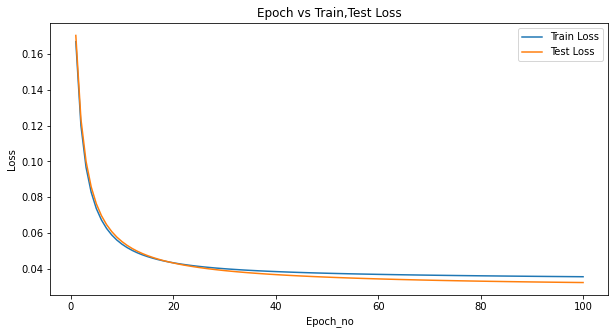

In [102]:
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epoch_no")
plt.ylabel('Loss')
plt.legend()
print(100*'==')